### LSTM을 사용한 IMDB
--------------------
IMDB 데이터셋: 케라스에 포함되어있는 데이터셋으로 인터넷 영화의 데이터베이스로부터 가져온 양극단의 리뷰 5만개로 이루어진 데이터셋

IMDB 데이터 특징

    1) 전처리되어 있어 각 리뷰가 숫자 시퀀스로 변환되어 있음
    2) 각 숫자는 사전에 있는 고유한 단어를 나타냄
    3) 훈련 데이터 2만 5천개와 테스트 데이터 2만 5천개로 나뉨
    4) 각각 50%는 긍정, 50%는 부정으로 구성

--------------------
LSTM (순환 신경망) : 이전 스텍의 출력값이 다시 입력으로 연결되는 신경망을 순환 신경망이라 하는데 RNN에서의 기울기 소실을 보안한 신경망

LSTM 모델 특징 

    1) 메모리가 있으며 메모리 입출력 컨트롤을 위한 게이트가 존재
    2) 게이트 된 셀에서 재발 성 네트워크의 정상적인 흐름 외부의 정보가 포함
    3) 시간과 계층을 통해 역 전파 될 수있는 오류를 보존하는 데 도움
    4) 문자 번역, 음성인식(연속적, 반복적)에 좋음
    5) 계산결과가 이전 계산 결과에 영향을 받음
    
LSTM 핵심!
    
    - Memory Sell
    - Sell State
    
RNN과 LSTM

- LSTM > RNN : LSTM이 상위 호환
    - 이유 : LSTM이 RNN의 장기 의존성 문제, 역전파시 생기는 기울기 손실 문제를 해결한 모델

In [10]:
# IMDB과 LSTM을 포함한 사용할 패키지를 가져옴
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

maxfeatures = 15000
maxword = 150

# 훈련, 시험셋을 불러옴
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maxfeatures)

In [11]:
#훈련셋과 시험셋을 구분하고 15000개씩 끊고
x_val = x_train[15000:]
y_val = y_train[15000:]
x_train = x_train[:15000]
y_train = y_train[:15000]

In [13]:
# 데이터셋 전처리로 문장의 길이를 앞에서 150(maxword) 설정대로 맞춤
x_train = sequence.pad_sequences(x_train, maxlen=maxword)
x_val = sequence.pad_sequences(x_val, maxlen=maxword)
x_test = sequence.pad_sequences(x_test, maxlen=maxword)

In [14]:
# LSTM 모델을 구현
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128)) #LSTM 레이어에는 timesteps으로 입력됨
model.add(Dense(1, activation='sigmoid'))
model.summary() #summary출력

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 모델을 학습하기 위해 과정을 정하고
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 25에포크로 모델 학습을 시작
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/25
15000/15000 [==============================] - 141s 9ms/step - loss: 0.5078 - acc: 0.7368 - val_loss: 0.3481 - val_acc: 0.8535
Epoch 2/25
15000/15000 [==============================] - 140s 9ms/step - loss: 0.2668 - acc: 0.8940 - val_loss: 0.3440 - val_acc: 0.8588
Epoch 3/25
15000/15000 [==============================] - 134s 9ms/step - loss: 0.1585 - acc: 0.9433 - val_loss: 0.3813 - val_acc: 0.8445
Epoch 4/25
15000/15000 [==============================] - 134s 9ms/step - loss: 0.0958 - acc: 0.9679 - val_loss: 0.4516 - val_acc: 0.8458
Epoch 5/25
15000/15000 [==============================] - 139s 9ms/step - loss: 0.0825 - acc: 0.9737 - val_loss: 0.5539 - val_acc: 0.8372
Epoch 6/25
15000/15000 [==============================] - 139s 9ms/step - loss: 0.0805 - acc: 0.9713 - val_loss: 0.5578 - val_acc: 0.8443
Epoch 7/25
15000/15000 [==============================] - 141s 9ms/step - loss: 0.0356 - acc: 0.9887 - val_loss: 0.6697 - 

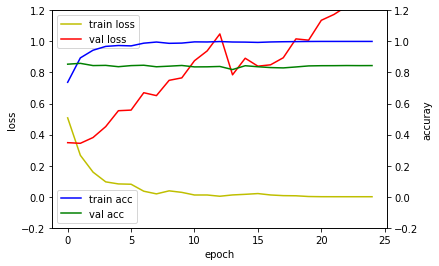

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt #plt.subplots사용을 위한 임포트

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [17]:
# 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('- 평가결과는?! -')
print(loss_and_metrics)

25000/25000 [==============================] - 45s 2ms/step
- 평가결과는?! -
[1.3167530688476563, 0.8375599999809266]
